In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/bruno/Zajecia/R Python/PodbielskiBruno/cleaned.csv")

# Opis zbioru danych

In [3]:
df.shape

(2952, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2952 non-null   object 
 1   Product_Description  2952 non-null   object 
 2   Screen_Size          2952 non-null   float64
 3   RAM                  2952 non-null   object 
 4   Processor            2952 non-null   object 
 5   GPU                  2604 non-null   object 
 6   GPU_Type             2718 non-null   object 
 7   Resolution           2565 non-null   object 
 8   Condition            2952 non-null   object 
 9   Price                2952 non-null   float64
dtypes: float64(2), object(8)
memory usage: 230.8+ KB


Jako, że w pliku zip znajdowały się dwa pliki, zakładam że polecenie pracy domowej odnosi się do "cleaned".\
Zbiór danych zawiera dane na temat laptopów. Ma 2952 wiersze i 10 kolumn. Wszystkie kolumny są typu object, oprócz Screen_Size i Price (typu float64).

Nazwy kolumn oznaczają kolejno:\
Brand - marka laptopa\
Product_Description - dane techniczne\
Screen_Size - ile ekran ma cali\
RAM - pojemność RAM w GB\
Processor - marka procesora i jego generacja\
GPU	- marka i model GPU\
GPU_Type - informacja czy GPU jest zintegrowane itp.\
Resolution - rozdzielczość w pikselach\
Condition - stan produktu\
Price - cena w USD

# Analiza zmiennych w zbiorze danych

In [5]:
df.describe()

,Screen_Size,Price
count,2952.000000,2952.000000
mean,14.550237,517.552805
std,1.175322,235.592872
min,10.000000,0.000000
25%,14.000000,325.990000
50%,14.000000,489.990000
75%,15.600000,699.000000
max,18.000000,999.990000


Są komputery, które nic nie kosztują...

# Analiza zmiennych w zależności od przynależności do grupy

In [45]:
df.groupby("Processor").Price.agg("count")

Processor
AMD Ryzen 3 3000 Series          5
AMD Ryzen 3 4000 Series          2
AMD Ryzen 5 3000 Series          1
AMD Ryzen 5 5000 Series          9
AMD Ryzen 5 6000 Series          1
AMD Ryzen 5 7000 Series         19
AMD Ryzen 7 4000 Series          1
AMD Ryzen 7 5000 Series          4
AMD Ryzen 7 6000 Series          1
AMD Ryzen 7 7000 Series          9
AMD Ryzen 9 6000 Series          1
AMD Ryzen 9 7000 Series          6
Intel Core i3 10th Gen.         59
Intel Core i3 11th Gen.        130
Intel Core i3 12th Gen.         52
Intel Core i3 13th Gen.          7
Intel Core i3 4th Gen.          11
Intel Core i3 5th Gen.           1
Intel Core i3 6th Gen.          10
Intel Core i3 7th Gen.           3
Intel Core i3 8th Gen.          12
Intel Core i5 10th Gen.        212
Intel Core i5 11th Gen.        450
Intel Core i5 12th Gen.        188
Intel Core i5 13th Gen.        101
Intel Core i5 4th Gen.          46
Intel Core i5 5th Gen.          20
Intel Core i5 6th Gen.          84
Intel Core

Procesorów AMD Ryzen jest znacznie mniej od Intel.\
Najpopularniejszy Intel Core i5 11th Gen. (450)

# Wykresy analizujące rozkład zmiennych

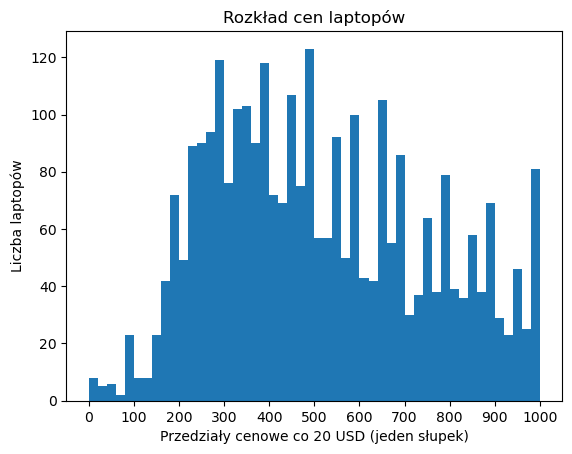

In [7]:
num_bins = 50 # co 20 dolarów
plt.hist(df.Price, num_bins)
plt.xticks(np.arange(0, 1100, step=100))
plt.xlabel('Przedziały cenowe co 20 USD (jeden słupek)')
plt.ylabel('Liczba laptopów')
plt.title('Rozkład cen laptopów')
plt.show()

Nie widać tutaj żadnego charakterystycznego rozkładu. Można stwierdzić, że tanich laptopów (< 200 USD) było bardzo mało. Co ciekawe, zwykle najwięcej cen w danej setce plasowało się w 4/5 do prawego końca przedziału, tzn. w 0 - 100 najwięcej było laptopów między 80 a 100 USD (porównując z pozostałymi podprzedziałami). Duży wpływ na to może mieć ustalanie ceny przez producenta na 99.99 zamiast 100, co może stanowić chwyt marketingowy na niektórych klientów. :)

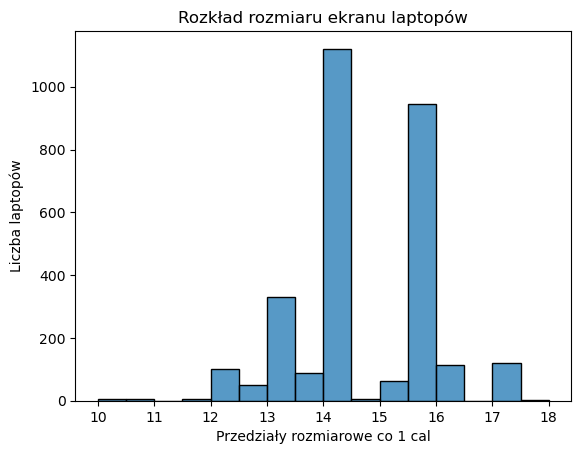

In [8]:
sns.histplot(x='Screen_Size', data=df, bins=16)
plt.xlabel('Przedziały rozmiarowe co 1 cal')
plt.ylabel('Liczba laptopów')
plt.title('Rozkład rozmiaru ekranu laptopów')
plt.show()

Rozkład rozmiaru ekranu nie jest symetryczny i w tym przypadku raczej też nie należałoby się dopatrywać jakiegoś szczególnego rozkładu. Dane nie wyglądają jakby zostały wygenerowane z np: Gaussa przesuniętego w prawo, ze względu na "dziury", co mogłoby sugerować ułożenie przy bins=8. Najwięcej ekranów ma ponad 14 cali, sporo jest także tych z około 16.

# Wykresy wskazujące zależności w zbiorze danych

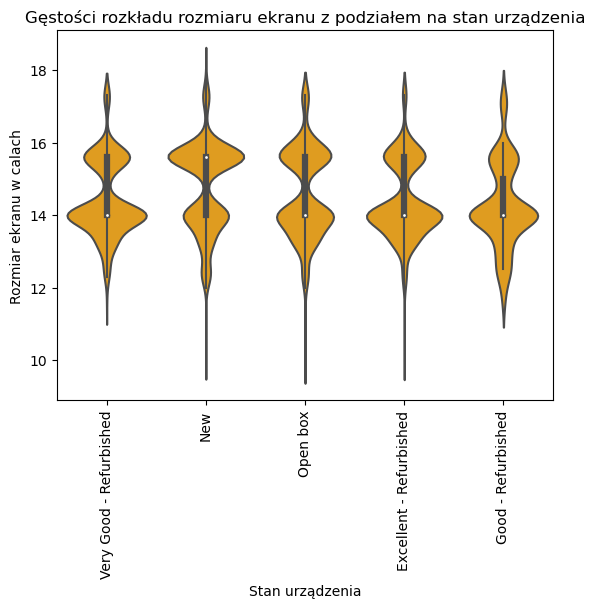

In [34]:
c=sns.violinplot(x='Condition', y='Screen_Size', data=df, color='orange')
c.set_xticklabels(
    c.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='center'
)
plt.xlabel('Stan urządzenia')
plt.ylabel('Rozmiar ekranu w calach')
plt.title('Gęstości rozkładu rozmiaru ekranu z podziałem na stan urządzenia')
plt.show()

Widać, że niezależnie od stanu najwięcej jest laptopów z ekranem rozmiaru około 14 i 16. Jednak im lepszy stan, tym grupa laptopów z rozmiarem koło 16 wydaje się większa (jeśli chodzi o proporcje) a 14 mniejsza.

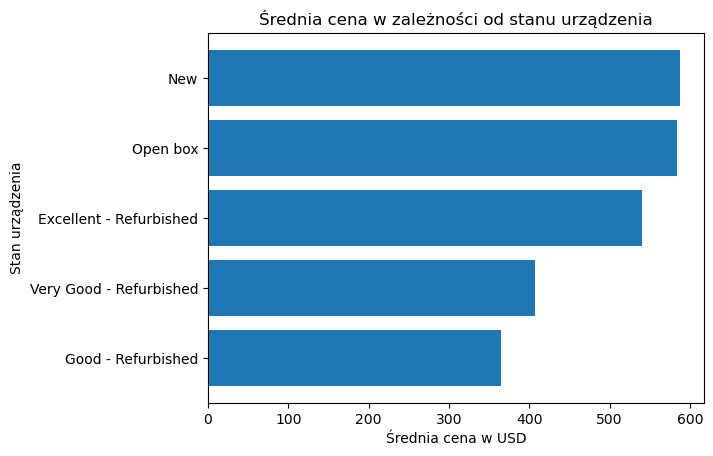

In [42]:
d=df.groupby("Condition").Price.mean().reset_index().sort_values(by='Price', ascending=True)
plt.barh('Condition', 'Price',data=d )
plt.ylabel('Stan urządzenia')
plt.xlabel('Średnia cena w USD')
plt.title('Średnia cena w zależności od stanu urządzenia')
plt.show()

Im lepszy stan urządzenia, tym wyższa średnia cena.